
# 🎬 GenAI × Drug Discovery — Intro
**Welcome!** This short intro for the full course—just the vibe, goals, and a couple of tiny, fun demos.

> **What to expect from the full series**  
> - Short, bingeable episodes with hands‑on notebooks.  
> - Real‑world datasets and modern GenAI stacks.  
> - Practical recipes, safety-aware workflows, and a capstone.  

**Subscribe & turn on notifications** so you don’t miss Episode 1.



## Before you start
- This notebook runs best on **Google Colab** with a **GPU** (optional for this intro).
- Feel free to skim and hit **Run all** for a quick tour.
- We won't reveal the course breakdown here—this is strictly a vibe check. 😎

> 💡 Tip: If you're new to Python notebooks, just press **Runtime → Run all** in Colab.



## Course Goals (at a glance)
- **Practical intuition + hands‑on skill** for applying modern GenAI across the **end‑to‑end drug discovery pipeline**—from ideas to triage and decision support.  
  *You’ll see how data flows, where GenAI helps, and how to make results reproducible.*
- **Full stack coverage:** **data, models, evaluation, optimization**, and how these connect with **wet‑lab** and **physics‑based simulation** (at a conceptual level in this intro).  
  *We won’t show the actual methods here—that starts in Module 0.*
- **Responsible innovation:** Strong focus on **reproducibility**, **safety**, and **limits of models**.  
  *You’ll learn what to trust, what to question, and how to communicate uncertainty.*

## Who This Is For
- **Track A — ML/AI engineers** moving into **chemistry/biology**: you’ll get the domain context and patterns to adapt your ML instincts safely.
- **Track B — Life‑science students/researchers** moving into **ML/GenAI**: you’ll get the coding patterns and mental models to build robust workflows.
- **Track C — Product/Innovation leads**: you’ll get conceptual fluency to evaluate roadmaps, resourcing, and risk.


## Prerequisites (minimal)
- **Python** (functions, classes, virtual env/poetry, notebooks), **NumPy**, **pandas**, **matplotlib**.  
  *We keep the code readable and annotated—copy‑paste friendly.*
- **Basic linear algebra & probability** (vectors, matrices, expectations).  
  *Enough to understand embeddings and metrics.*
- **Optional primers in Module 0**: we include a calm on‑ramp if you’re rusty.

## Core Stack (used across episodes)
- **Python/ML:** PyTorch, **PyTorch Geometric**, Lightning, **Hugging Face Transformers/PEFT**, **RDKit**, **DeepChem**.  
  *Covers deep learning, graphs, transfer/fine‑tuning, and cheminformatics utilities.*
- **Chem/Bio tooling:** **Open Babel**, **OpenFF**, **OpenMM**, MDAnalysis, Biopython, Rosetta (select), **AutoDock Vina/GNINA**, **DiffDock**.  
  *For representation conversions, force fields, light MD, basic docking, and structure‑aware tasks.*
- **Infra:** **Weights & Biases** (or MLflow), **Hydra**, **Docker**, **CUDA**; optional cloud (**GCP/AWS**) with spot GPU.  
  *For experiment tracking, config management, reproducibility, and cost control.*
- **Data Sources:** **ChEMBL**, **PubChem**, **BindingDB**, **PDB**, **UniProt**, **ZINC**, **Enamine REAL**, **DrugBank**, **SIDER**, **ClinTox**, **Tox21**, **ADMETlab** APIs.  
  *We’ll respect terms of service and demonstrate safe, citation‑friendly use.*


In [ ]:
#@title 🔧 Quick Setup (Colab)
# If running in Colab, uncomment the installs you need.
# Note: We'll keep this light—full installs come in Module 0.

!pip -q install selfies
!pip install -q rdkit
# Optional (preview only; full stack will be set up later):
!pip -q install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip -q install matplotlib pandas numpy
!pip -q install ipywidgets

print("✅ Setup cell ready. Uncomment lines to install when in Colab.")


✅ Setup cell ready. Uncomment lines to install when in Colab.


In [ ]:

#@title ⚙️ Quick CUDA/GPU Check
import os, sys, platform, time

def banner(msg):
    print("\n" + "="*len(msg))
    print(msg)
    print("="*len(msg))

banner("Environment Snapshot")
print("Python:", sys.version.split()[0], "| OS:", platform.system(), platform.release())
print("Working Dir:", os.getcwd())
print("Time:", time.ctime())

try:
    import torch
    cuda = torch.cuda.is_available()
    print("PyTorch:", torch.__version__)
    print("CUDA available:", cuda)
    if cuda:
        print("GPU name:", torch.cuda.get_device_name(0))
    else:
        print("Tip: In Colab → Runtime → Change runtime type → GPU")
except Exception as e:
    print("PyTorch not available yet. That's fine—this is just a teaser.")



Environment Snapshot
Python: 3.12.12 | OS: Linux 6.6.105+
Working Dir: /content
Time: Thu Oct 16 18:48:45 2025
PyTorch: 2.8.0+cu126
CUDA available: True
GPU name: Tesla T4



## Tiny visual teaser — molecule postcards
We'll draw a small grid of familiar, over‑the‑counter molecules just to set the mood 🧪  
(*Educational visualization only*)


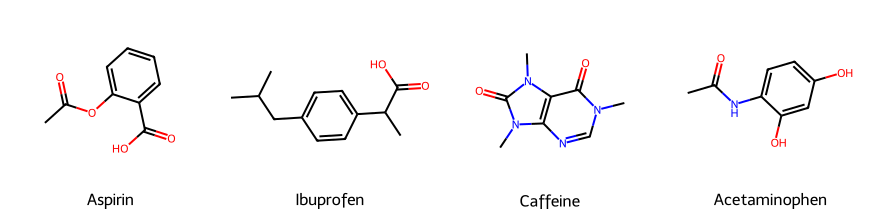

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw, rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

smiles = {
    "Aspirin": "CC(=O)OC1=CC=CC=C1C(=O)O",
    "Ibuprofen": "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O",
    "Caffeine": "Cn1c(=O)n(C)c2ncn(C)c(=O)c12",  # fixed
    "Acetaminophen": "CC(=O)NC1=CC=C(O)C=C1O",
}

mols, labs = [], []
for name, smi in smiles.items():
    try:
        m = Chem.MolFromSmiles(smi)
        if not m:
            print(f"Skipped {name}: invalid SMILES")
            continue
        Chem.SanitizeMol(m)  # ensure clean sanitization
        mols.append(m); labs.append(name)
    except Exception as e:
        print(f"{name}: {e}")

img = Draw.MolsToGridImage(mols, molsPerRow=4, legends=labs, subImgSize=(220,220))
display(img)



## A playful nudge — text → molecules (toy)
Generative AI loves tokens. Here’s a tiny **SELFIES** demo that randomly samples valid strings.  
This is **not** an actual drug design step—just a fun peek at text-based molecule representations.


In [ ]:

#@title 🎲 Random SELFIES sampler (toy)
# Educational randomness; not medicinal advice.
import random
try:
    import selfies as sf
    alphabet = list(sf.get_semantic_robust_alphabet())
    # Sample a short sequence of SELFIES tokens
    tokens = [random.choice(alphabet) for _ in range(6)]
    selfies_str = "".join(tokens)
    smiles = sf.decoder(selfies_str)
    print("SELFIES:", selfies_str)
    print("Decoded SMILES:", smiles)
    try:
        from rdkit import Chem
        from rdkit.Chem import Draw
        m = Chem.MolFromSmiles(smiles)
        if m:
            Draw.MolToImage(m, size=(250,250)).show()
        else:
            print("Decoder produced an unparsable SMILES this time—try again!")
    except Exception:
        pass
except Exception as e:
    print("SELFIES not installed yet. Uncomment installs in the setup cell and re-run.")
    print("Error:", e)


SELFIES: [I][#S][#P-1][N-1][#C-1][#P-1]
Decoded SMILES: IS#[P-1][N-1][C-1]=[P-1]


SELFIES: [I][#Branch3][=N+1][=C][Branch2][Cl][#P-1][F]
Decoded SMILES: I[N+1]=CF


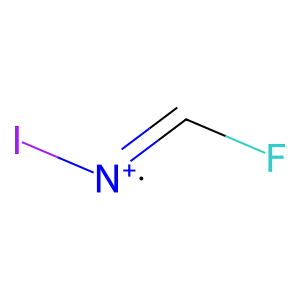

In [ ]:
'''
# 🎲 Less-silly SELFIES sampler
import random
import selfies as sf
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors

rng = random.Random(0)  # set a seed if you want reproducibility

alphabet = list(sf.get_semantic_robust_alphabet())

# Heavy-atom tokens (exclude H, Branch, Ring)
heavy_atom_tokens = [t for t in alphabet
                     if t.startswith('[') and t.endswith(']')
                     and 'Branch' not in t and 'Ring' not in t
                     and t not in ('[H]',)]
# Non-atom structural tokens (branches, rings, etc.)
structural_tokens = [t for t in alphabet
                     if 'Branch' in t or 'Ring' in t]

def sample_valid_selfies(max_tries=500, length=8):
    for _ in range(max_tries):
        # ensure we start with a heavy atom and sprinkle more later
        tokens = [rng.choice(heavy_atom_tokens)]
        # bias toward atoms but allow some structure tokens
        for i in range(1, length):
            pool = heavy_atom_tokens if rng.random() < 0.7 else structural_tokens
            # fallback if structural pool is empty for some envs
            if not pool:
                pool = heavy_atom_tokens
            tokens.append(rng.choice(pool))

        s = "".join(tokens)
        smiles = sf.decoder(s)
        m = Chem.MolFromSmiles(smiles)
        if m and Descriptors.HeavyAtomCount(m) >= 2 and m.GetNumBonds() >= 1:
            return s, smiles, m
    return None, None, None

s, smiles, mol = sample_valid_selfies(length=8)

if mol:
    print("SELFIES:", s)
    print("Decoded SMILES:", smiles)
    display(Draw.MolToImage(mol, size=(300,300)))
else:
    print("Couldn’t find a decent molecule this round—try increasing max_tries or length.")
'''


## Who this course is for
- **Builders** who want practical GenAI skills applied to molecules and proteins.  
- **Scientists/engineers** who value rigor, reproducibility, and safety.  
- **Leads & founders** who need the mental models to evaluate investments and roadmap decisions.

### Tone & pacing
- Short, focused episodes.
- One idea → one demo.
- Realistic constraints (data quality, compute, and time).

### Safety & responsibility
- Educational content only; no actionable wet‑lab protocols or harmful instructions.  
- Emphasis on model limitations, uncertainty, and human expert oversight.



## Micro‑quiz (for fun)
1. Why might *validity* and *diversity* both matter in generative chemistry?  
2. What are some reasons **uncertainty estimates** are crucial in decision‑making?  
3. Name one reason **data splits** in chemistry need extra care.



## You're early — and that's awesome
If this teaser got you curious, you're exactly the audience we had in mind.

**Next:** Episode 1 (Module 0) starts with smooth environment setup and a zero‑stress on‑ramp.  
**Call to action:** Subscribe, like, and comment what you want to build with GenAI this year.

> *This intro deliberately hides the syllabus details to keep surprises fresh for the premiere.*
